In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Application: X-ray Burst Timing

The [Rossi X-ray Timing Explorer](https://en.wikipedia.org/wiki/Rossi_X-ray_Timing_Explorer) (RXTE) has very high time resolution and has been used to observe a large number of X-ray sources.  We'll look at the data from the low-mass X-ray binary 4U 1728-34&mdash;this is an [X-ray burst](https://en.wikipedia.org/wiki/X-ray_burster) system.

In [Strohmayer et al. 1996](https://ui.adsabs.harvard.edu/abs/1996ApJ...469L...9S/abstract) it was shown that the neutron star spin rate can be seen in the Fourier transform of the lightcurve of the burst.  Here we repeat the analysis.

_We thank Tod Strohmayer for sharing the data from that paper._ : [4u1728_burstdata.txt](4u1728_burstdata.txt)

We'll read in the data&mdash;although it is stored in a multidimensional fashion in the file, it is actually a time-series, so we'll flatten the data into a 1-d array.

In [6]:
data = np.loadtxt("4u1728_burstdata.txt").flatten()

In [7]:
N = len(data)
N

262144

We can start out by plotting all of the data.

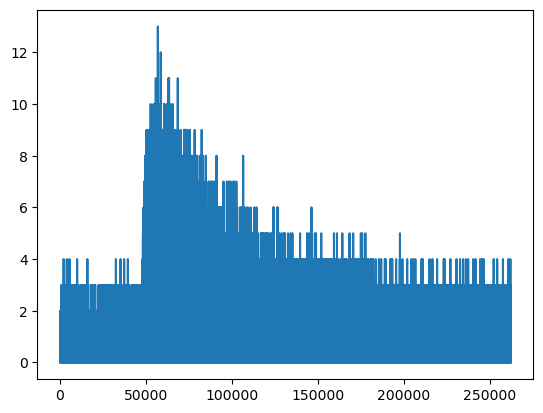

In [8]:
fig, ax = plt.subplots()
ax.plot(data)

We'll bin the data into fewer samples to build up the signal to noise.  We can do this by reshaping it into a 2-d array and then summing over the columns.

In [9]:
binned_data = data.reshape(N // 256, 256).sum(axis=1)

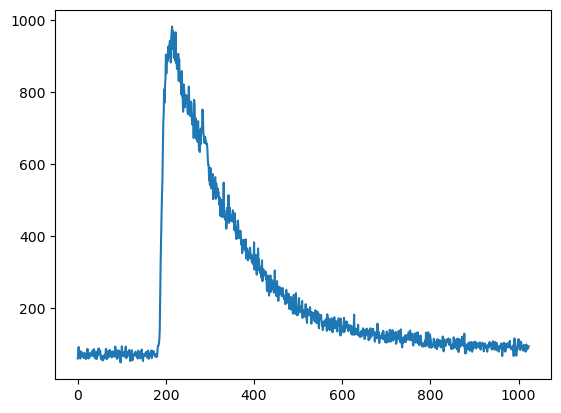

In [10]:
fig, ax = plt.subplots()
ax.plot(binned_data)

Now we see a much clearer X-ray lightcurve.

Next we want to take the FFT and look to see if there are any interesting frequencies with a lot of power

In [12]:
c_k = np.fft.rfft(data)

We want to get the physical frequencies corresponding to the Fourier coefficients

In [18]:
T = 32.0
kfreq = np.fft.rfftfreq(N) * N / T

Now we can plot the power spectrum.  We normalize by $2/N$

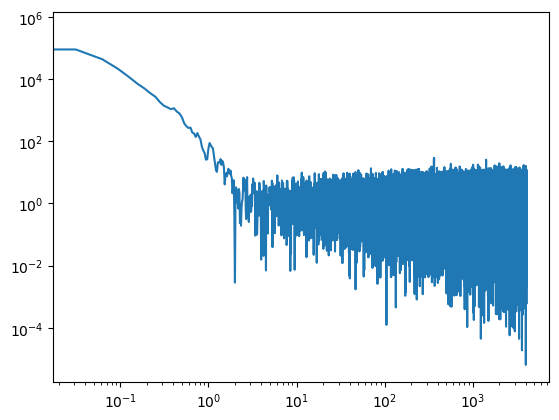

In [23]:
fig, ax = plt.subplots()
ax.plot(kfreq, np.abs(c_k)**2 * 2 / N)

ax.set_xscale("log")
ax.set_yscale("log")

Here we see a signal around 300 Hz. We'll bin the Fourier data to increase the signal to noise

In [24]:
c_k_binned = np.abs(c_k[1:]).reshape(int(len(c_k)/8), 8).mean(axis=1)
kfreq_binned = kfreq[1:].reshape(int(len(kfreq)/8), 8).mean(axis=1)

(0.0, 20.0)

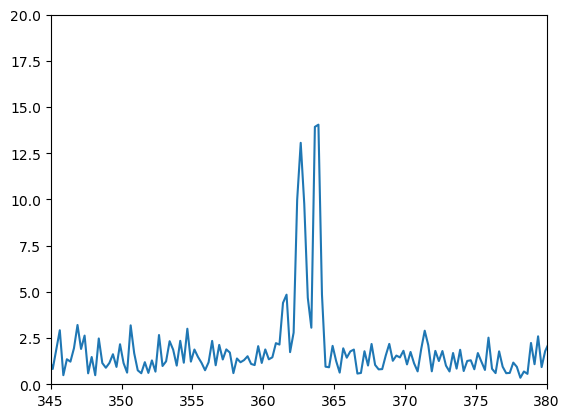

In [25]:
fig, ax = plt.subplots()
ax.plot(kfreq_binned, c_k_binned**2 * 2 / N)

ax.set_xlim(345, 380)
ax.set_ylim(0, 20)

Now we see the strong signal at around 363 Hz&mdash;this is the same frequency identified as the neutron star rotation rate in the original paper.